<a href="https://www.kaggle.com/code/shanakk/bank-personal-loan-logistic-regression?scriptVersionId=142530748" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-personal-loan-modelling/Bank_Personal_Loan_Modelling.csv


In [2]:
import numpy as np 
import pandas as pd 

In [3]:
df=pd.read_csv('/kaggle/input/bank-personal-loan-modelling/Bank_Personal_Loan_Modelling.csv')
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [6]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [7]:
df=df[['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family','Education','Mortgage','CreditCard', 'Personal Loan']]

In [8]:
df

,ID,Age,Experience,Income,ZIP Code,Family,Education,Mortgage,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1,0,0,0
1,2,45,19,34,90089,3,1,0,0,0
2,3,39,15,11,94720,1,1,0,0,0
3,4,35,9,100,94112,1,2,0,0,0
4,5,35,8,45,91330,4,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,3,0,0,0
4996,4997,30,4,15,92037,4,1,85,0,0
4997,4998,63,39,24,93023,2,3,0,0,0
4998,4999,65,40,49,90034,3,2,0,0,0


In [9]:
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [10]:
X=df.drop('Personal Loan',axis=1)
y=df['Personal Loan']

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [12]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver='liblinear')
model.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [13]:
y_test_pred=model.predict(X_test)

In [14]:
comarison=pd.DataFrame({'Actual':y_test,'Predicted':y_test_pred})
comarison

,Actual,Predicted
2764,0,0
4767,0,0
3814,0,0
3499,0,0
2735,0,0
...,...,...
4140,0,0
3969,0,0
2535,0,0
1361,0,0


In [15]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_test_pred))

0.908


In [16]:
y_train_pred=model.predict(X_train)
print(accuracy_score(y_train,y_train_pred))

0.9091428571428571


In [17]:
y_test_proba=model.predict_proba(X_test)
print(y_test_proba.shape)

(1500, 2)


In [18]:
y_test_proba[0:5,:]

array([[0.9448574 , 0.0551426 ],
       [0.98657436, 0.01342564],
       [0.99294277, 0.00705723],
       [0.86903593, 0.13096407],
       [0.9662084 , 0.0337916 ]])

In [19]:
abc=y_test_proba[:,1]
ghi=y_test_proba[:,0]
result=pd.DataFrame({'Actual':y_test,'Prdictions':y_test_pred,'Prob(class=0)':ghi,'Prob(class=1)':abc})
result

,Actual,Prdictions,Prob(class=0),Prob(class=1)
2764,0,0,0.944857,0.055143
4767,0,0,0.986574,0.013426
3814,0,0,0.992943,0.007057
3499,0,0,0.869036,0.130964
2735,0,0,0.966208,0.033792
...,...,...,...,...
4140,0,0,0.994050,0.005950
3969,0,0,0.970645,0.029355
2535,0,0,0.993692,0.006308
1361,0,0,0.991928,0.008072


In [20]:
from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(y_test,y_test_pred)
conf_matrix

array([[1319,   32],
       [ 106,   43]])

Text(95.72222222222221, 0.5, 'Actual value')

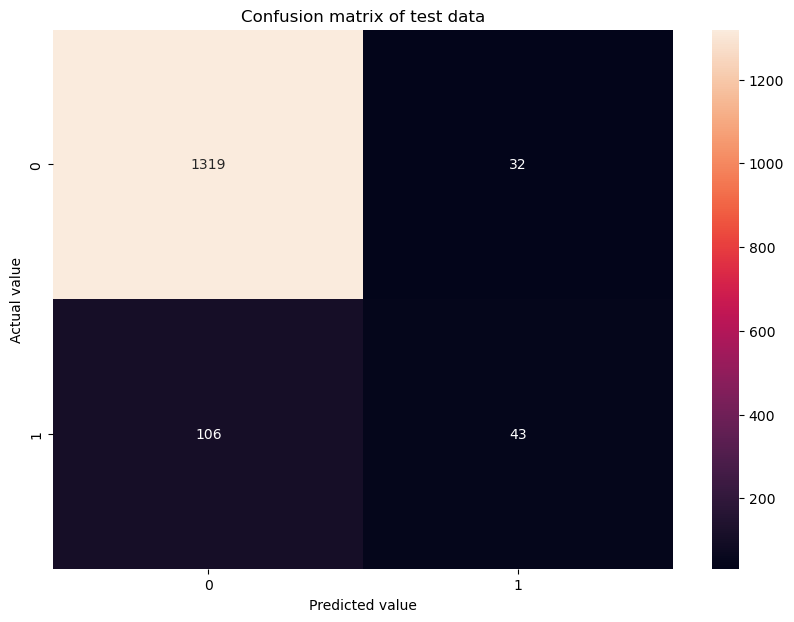

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix,annot=True,fmt='d')
plt.title("Confusion matrix of test data")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")

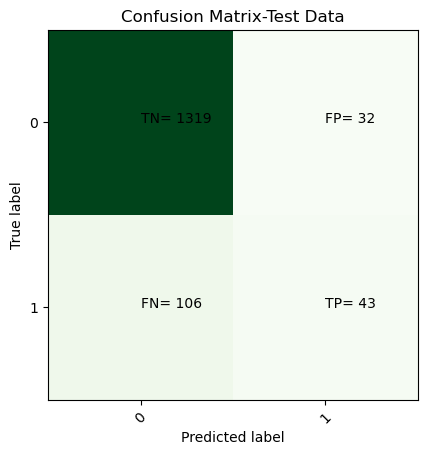

In [22]:
plt.clf()
plt.imshow(conf_matrix,interpolation='nearest',cmap=plt.cm.Greens)
classnames=[0,1]
plt.title('Confusion Matrix-Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(2)
plt.xticks(tick_marks,classnames,rotation=45)
plt.yticks(tick_marks,classnames)
s = [['TN','FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+"= "+str(conf_matrix[i][j]))
plt.show()

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1351
           1       0.57      0.29      0.38       149

    accuracy                           0.91      1500
   macro avg       0.75      0.63      0.67      1500
weighted avg       0.89      0.91      0.89      1500



In [24]:

TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]
TP = conf_matrix[1][1]

In [25]:
recall=TP/(TP+FN)
recall

0.28859060402684567

In [26]:
precision=TP/(TP+FP)
precision

0.5733333333333334

In [27]:
specificity=TN/(TN+FP)
specificity

0.9763138415988157

In [28]:
accuracy=(TP+TN)/(TP+FP+FN+TN)
accuracy

0.908